In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.svm import SVC as svc
from sklearn.metrics import accuracy_score

In [24]:
# first let's take a look at out data!:
cepheid = pd.read_csv('/content/drive/MyDrive/cepheid')
rr = pd.read_csv('/content/drive/MyDrive/rr')
# note that I calculated distance in TOPCAT (the distance's unit is pc)

In [25]:
cepheid = cepheid[cepheid.parallax>0] # deleting values with negative parallax
cepheid = cepheid.dropna() # deleting those rows which do not have a number
rr = rr[rr.parallax>0]
rr = rr.dropna()
print (cepheid.shape)
print (rr.shape)

(3344, 5)
(60317, 5)


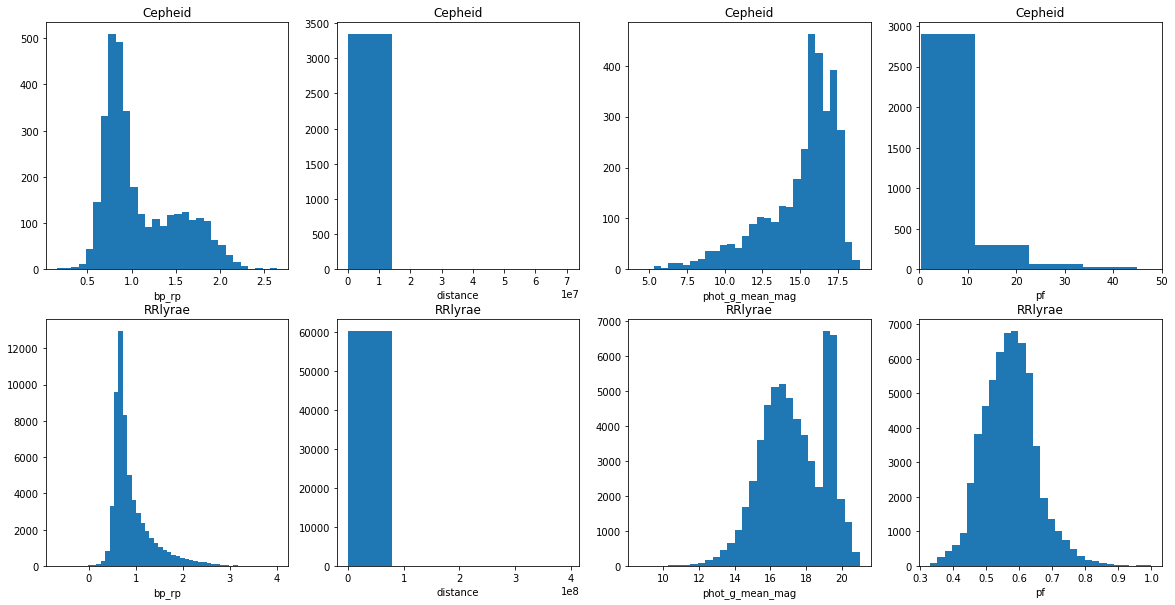

In [11]:
# Another crucial step is to illustrate data:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.xlabel('bp_rp')
plt.title('Cepheid')
plt.hist(cepheid.bp_rp, bins = 30);

plt.subplot(2,4,2)
plt.xlabel('distance')
plt.title('Cepheid')
plt.hist(cepheid.distance, bins = 5)

plt.subplot(2,4,3)
plt.xlabel('phot_g_mean_mag')
plt.title('Cepheid')
plt.hist(cepheid.phot_g_mean_mag, bins = 30)

plt.subplot(2,4,4)
plt.xlabel('pf')
plt.title('Cepheid')
plt.xlim(0,50)
plt.hist(cepheid.pf, bins = 30)

plt.subplot(2,4,5)
plt.xlabel('bp_rp')
plt.title('RRlyrae')
plt.hist(rr.bp_rp, bins = 50);

plt.subplot(2,4,6)
plt.xlabel('distance')
plt.title('RRlyrae')
plt.hist(rr.distance, bins = 5)

plt.subplot(2,4,7)
plt.xlabel('phot_g_mean_mag')
plt.title('RRlyrae')
plt.hist(rr.phot_g_mean_mag , bins = 30)

plt.subplot(2,4,8)
plt.xlabel('pf')
plt.title('RRlyrae')
plt.hist(rr.pf , bins = 30)

plt.show()

According to graphs, it is obvious that there are some common areas. In this following, I want to confine the data to those measures (to make the prediction difficult)

In [26]:
cepheid = cepheid[(cepheid.phot_g_mean_mag>14)&(cepheid.phot_g_mean_mag<18)]
cepheid = cepheid[(cepheid.bp_rp>0.5)&(cepheid.bp_rp<2)]
rr = rr[(rr.phot_g_mean_mag>14)&(rr.phot_g_mean_mag<19)]
rr = rr[(rr.bp_rp>0.5)&(rr.bp_rp<2)]
print (cepheid.shape)
print (rr.shape)

(2376, 5)
(40234, 5)


In [27]:
""" Bu what about the relation between same features of these two stars? From statistical point of view, these graphs are so useul.
The problem here is that the shape our data are not equall. So I will follow to approaches 
1) Selecting the first 3344 members of the rr set (3344 is the size of Cepheids)
2) Selecting a subset with 3344 members randomly"""

rr_f = rr[:2376]
rr_r = rr.sample(2376, random_state = 5)

C1_bp,_ = stats.pearsonr(rr_f.bp_rp , cepheid.bp_rp)
C1_dis,_ = stats.pearsonr(rr_f.distance , cepheid.distance)
C1_phot,_ = stats.pearsonr(rr_f.phot_g_mean_mag , cepheid.phot_g_mean_mag)
C1_p,_ = stats.pearsonr(rr_f.pf,cepheid.pf)
C2_bp,_ = stats.pearsonr(rr_r.bp_rp , cepheid.bp_rp)
C2_dis,_ = stats.pearsonr(rr_r.distance , cepheid.distance)
C2_phot,_ = stats.pearsonr(rr_r.phot_g_mean_mag , cepheid.phot_g_mean_mag)
C2_p,_ = stats.pearsonr(rr_r.pf,cepheid.pf)

D = np.array([[C1_bp, C1_dis, C1_phot, C1_p], [C2_bp, C2_dis, C2_phot, C2_p]])
table = pd.DataFrame(D, index = ['rr(the fisrt thirty)-cepheid' , 'rr(random)-cepheid'] , columns = ['bp_rp' , 'distance', 'apparent magnitude','pf'])

print (display(table));

,bp_rp,distance,apparent magnitude,pf
rr(the fisrt thirty)-cepheid,-0.014979,-0.001750,-0.075320,0.021054
rr(random)-cepheid,-0.021016,0.022771,-0.000196,0.033873


None


You can see that apart from the way we choose data from rr set, there is a negligible correlation between them.

We can see this from a scatter plot as well:

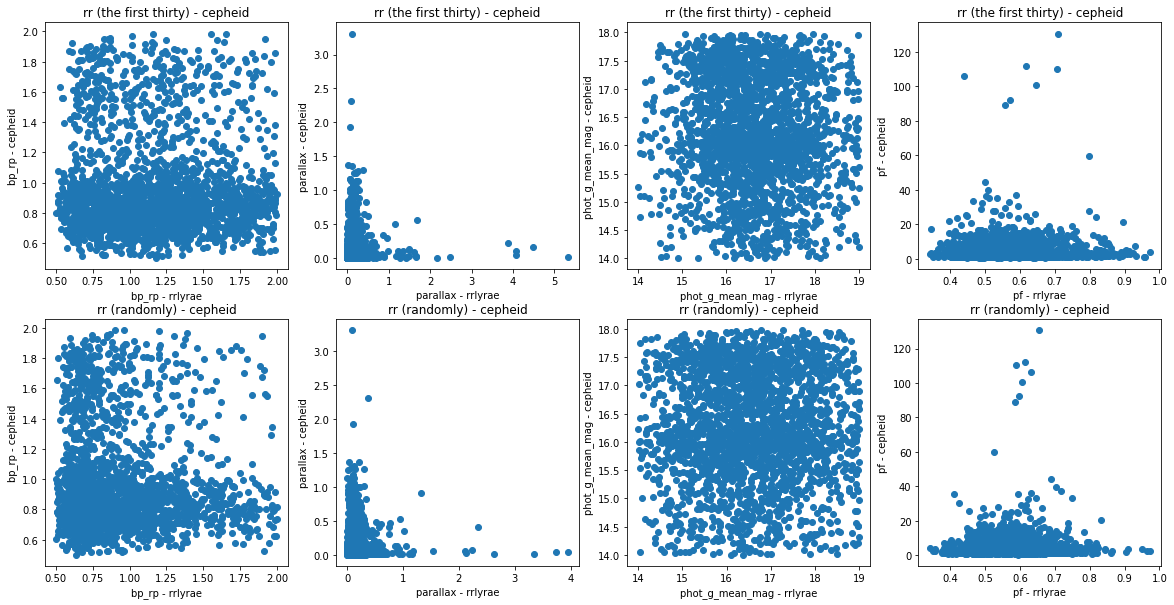

In [15]:
plt.figure(figsize = (20,10))

plt.subplot(2,4,1)
plt.xlabel('bp_rp - rrlyrae')
plt.ylabel('bp_rp - cepheid')
plt.title('rr (the first thirty) - cepheid')
plt.scatter(rr_f.bp_rp , cepheid.bp_rp)

plt.subplot(2,4,2)
plt.xlabel('parallax - rrlyrae')
plt.ylabel('parallax - cepheid')
plt.title('rr (the first thirty) - cepheid')
plt.scatter(rr_f.parallax , cepheid.parallax)

plt.subplot(2,4,3)
plt.xlabel('phot_g_mean_mag - rrlyrae')
plt.ylabel('phot_g_mean_mag - cepheid')
plt.title('rr (the first thirty) - cepheid')
plt.scatter(rr_f.phot_g_mean_mag , cepheid.phot_g_mean_mag)

plt.subplot(2,4,4)
plt.xlabel('pf - rrlyrae')
plt.ylabel('pf - cepheid')
plt.title('rr (the first thirty) - cepheid')
plt.scatter(rr_f.pf , cepheid.pf)

plt.subplot(2,4,5)
plt.xlabel('bp_rp - rrlyrae')
plt.ylabel('bp_rp - cepheid')
plt.title('rr (randomly) - cepheid')
plt.scatter(rr_r.bp_rp , cepheid.bp_rp)

plt.subplot(2,4,6)
plt.xlabel('parallax - rrlyrae')
plt.ylabel('parallax - cepheid')
plt.title('rr (randomly) - cepheid')
plt.scatter(rr_r.parallax , cepheid.parallax)

plt.subplot(2,4,7)
plt.xlabel('phot_g_mean_mag - rrlyrae')
plt.ylabel('phot_g_mean_mag - cepheid')
plt.title('rr (randomly) - cepheid')
plt.scatter(rr_r.phot_g_mean_mag , cepheid.phot_g_mean_mag)

plt.subplot(2,4,8)
plt.xlabel('pf - rrlyrae')
plt.ylabel('pf - cepheid')
plt.title('rr (randomly) - cepheid')
plt.scatter(rr_r.pf , cepheid.pf)


plt.show()

In the following, I select the random subset of rrlyrae and construct my machine learning model:

In [22]:
# generating label
class_1 = np.ones(2376 , dtype = int) # class 1 : cepheid
class_2 = np.zeros(2376 , dtype = int) # class 0 : rrlyrae
label = np.concatenate((class_1,class_2),axis = 0)
print (label.shape)

(4752,)


In [28]:
# generating data:
cepheid = np.asarray(cepheid[['bp_rp','distance','phot_g_mean_mag']])
rr_r = np.asarray(rr_r[['bp_rp','distance','phot_g_mean_mag']])
data = np.concatenate((cepheid , rr_r) , axis = 0)
data = (data-np.mean(data))/np.std(data)
print (data.shape)

(4752, 3)


In [29]:
# splitting data into train and test:
X_train,X_test,Y_train,Y_test = train_test_split(data,label, test_size = 0.2 , random_state = 9)
print (X_train.shape)
print (X_test.shape)

(3801, 3)
(951, 3)


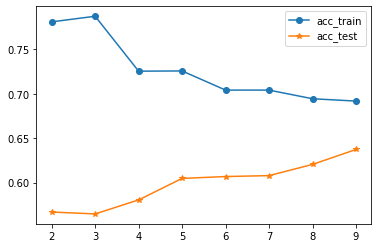

In [30]:
KN = sklearn.neighbors.KNeighborsClassifier
acc_train = []
acc_test = []
for i in range (2,10):
  clf = KN(n_neighbors=i).fit(X_train,Y_train)
  y_p = clf.predict(X_train)
  acc_tr = accuracy_score(Y_train, y_p)
  y_pp = clf.predict(X_test)
  acc_te = accuracy_score(Y_test, y_pp)
  acc_train.append(acc_tr)
  acc_test.append(acc_te)

x = range(2,10)
plt.plot(x ,acc_train, label = 'acc_train', marker = 'o')
plt.plot(x ,acc_test , label = 'acc_test', marker = '*')
plt.legend()
plt.show()

Considering test accuracy, the best choice for k is 9

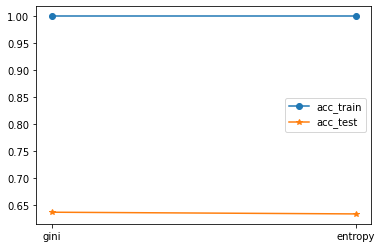

In [31]:
criteria = ['gini' , 'entropy']
acc_train = []
acc_test = []
for i in criteria:
  clf = DT(criterion=i).fit(X_train,Y_train)
  y_p = clf.predict(X_train)
  acc_tr = accuracy_score(Y_train, y_p)
  y_pp = clf.predict(X_test)
  acc_te = accuracy_score(Y_test, y_pp)
  acc_train.append(acc_tr)
  acc_test.append(acc_te)

x = ['gini' , 'entropy']
plt.plot(x ,acc_train, label = 'acc_train', marker = 'o')
plt.plot(x ,acc_test , label = 'acc_test', marker = '*')
plt.legend()
plt.show()

Contrary to train accuracy, decision tree couldnot achieve a high level in test accuracy